# **Atividade 6 - Métodos Numéricos para Resolução de Problemas de Valor de Contorno e Interpolação Polinomial**

Aluno: João Pedro Bizzi Velho

RA: 218711

# **Questão 1**



Dados do problema:

> $-(1-0,09(5-x))c''(x) - (0,2-0,01(5-x))c'(x) + 0,05c(x) = 0,025$

> $c(0) = 0$

> $c'(5) = 0$

Sendo $c(x)$ a concentração de poluente na profundidade $x$ do lago.



## **item (1)**

Determine o sistema geral de equações obtido pelo médo de finitas com aproximações $O(h^2)$.



Com a equação dada, e as aproximações dadas por:

> $c'(x_k) = \frac{c(x_k+h) - c(x_k-h)}{2h}$

> $c''(x_k) = \frac{c(x_k+h)-2c(x_k) + c(x_k-h)}{h^2}$

Além disto, podemos simplificar a equação com:

> $\alpha = (1-0,09(5-x))$

>$\beta = - (0,2-0,01(5-x))$

>$\mu = 0,05$

>$f(x) = 0.025$

Com isto, nossa equação se torna:

> $-(1-0,09(5-x))c''(x) - (0,2-0,01(5-x))c'(x) + 0,05c(x) = 0,025$

>$-\alpha \frac{c(x_k+h)-2c(x_k) + c(x_k-h)}{h^2} + \beta c'(x_k) = \frac{c(x_k+h) - c(x_k-h)}{2h} + \mu c(x) = f(x)$


Simplificando esta nova equação teremos o seguinte:

>$-\alpha \frac{c(x_k+1)-2c(x_k) + c(x_k-1)}{h^2} + \beta c'(x_k) = \frac{c(x_k+1) - c(x_k-1)}{2h} + \mu c(x) = f(x)$

Agrupando os termos de $c(x)$ teremos:

>>$(-\frac{\alpha}{h^2} - \frac{\beta}{2h})c_{k-1} + (\frac{2\alpha}{h^2} + \mu)c_k + (-\frac{\alpha}{h^2} + \frac{\beta}{2h})c_{k+1} = f_k$

Podemos montar o sistema fazendo $k = 1,2,3, ..., n - 1$ onde n é a quantidade de pontos dado pro $ n = \frac{5}{h}$.

> Para $k = 1$:

>> $(-\frac{\alpha}{h^2} - \frac{\beta}{2h})c_{0} + (\frac{2\alpha}{h^2} + \mu)c_1 + (-\frac{\alpha}{h^2} + \frac{\beta}{2h})c_{2} = f_1$

O mesmo para os outros valores de $k$, exceto para $k = n$ onde teremos uma exceção:

> $C_{n+1}$ não existe, logo teremos:

>> Usando a aproximação de $c_n'$, temos que:

>>> $c_n' \approx \frac{C_{n+1} - c_{n-1}}{2h}$

>>> Como é dado que $c'(5) = 0$ temos que $c'(n) = 0$, por isso, $c_{n+1} = c_{n-1}$.

Com isto , obtemos a última expressão, que é dada por:

> $(-\frac{\alpha}{h^2} - \frac{\beta}{2h})c_{n-1} + (\frac{2\alpha}{h^2} + \mu)c_n + (-\frac{\alpha}{h^2} + \frac{\beta}{2h})c_{n-1} = f_n$

Ou ainda:

> $C_{n-1}(-\frac{\alpha}{h^2} - \frac{\beta}{2h} - \frac{alpha}{h^2} + \frac{\beta}{2h}) + (\frac{2\alpha}{h^2} + \mu)c_n = f$

Por fim, isso equivale à:

> $(-\frac{2\alpha}{h^2})c_{n-1} + (\frac{2\alpha}{h^2} + \mu)c_n = f$




Com isto podemos montar o seguinte sistema:

> $k = 1$
>> $c_1(\frac{2\alpha}{h^2} + \mu) + c_2(-\frac{\alpha}{h^2} + \frac{\beta}{2h}) = f_1$

> $k = 2$
>> $c_1(-\frac{\alpha}{h^2} - \frac{\beta}{2h}) c_2(\frac{2\alpha}{h^2} + \mu) + c_3(-\frac{\alpha}{h^2} + \frac{\beta}{2h}) = f_2$

> $\dots$

> $ k = n $
>>> $(-\frac{2\alpha}{h^2})c_{n-1} + (\frac{2\alpha}{h^2} + \mu)c_n = f_n$

Por fim, para evitar dividirmos por h², podemos multiplicar todo o sistema por tal fator, obtendo o seguinte sistema final:

> $k = 1$
>> $c_1(2\alpha + h^2\mu) + c_2(-\alpha + \frac{h\beta}{2}) = h^2f_1$

> $k = 2$
>> $c_1(-\alpha - \frac{h\beta}{2}) c_2(2\alpha + h^2\mu) + c_3(-\alpha + \frac{h\beta}{2}) = h^2f_2$

> $\dots$

> $ k = n $
>>> $(-2\alpha)c_{n-1} + (2\alpha + \mu)c_n = h^2f_n$






# item (2)

Usando h = 1

Teremos 

> $ n = \frac{b - a}{h} = 5$. Portanto serão cinco valores de $h$ no intervalo $[0,5]$.


Podemos montar um sistema com 3 matrizes e resolve-lo $A*b = y$, onde b são os valores de $c(x)$, $y$ são os valores de $h^2f_x$. E por fim, A contém os coeficientes do sistema de equação montado no item A.


>$C(x) = - \frac{f(x)}{(1-0,09(5-x))}$

> $\alpha = (1-0,09(5-x))$

>$\beta = - (0,2-0,01(5-x))$

>$\mu = 0,05$

>$f(x) = 0.025$

In [2]:
def alpha(x):
    return (1-0.09*(5-x))
def beta(x):
    return -(0.2 - 0.01*(5-x))
def mu(x):
    return 0.05
    
# a = -alpha - bh/2
def A_k(x,h):
    return -alpha(x) - beta(x) * h /2

# b = 2alpha + mu (delta)^2
def B_k(x, h):
    return 2*alpha(x) + mu(x)*(h**2)
# c = -alpha + bh/2
def C_k(x,h):
    return -alpha(x) + beta(x) * h / 2



In [3]:
import numpy as np
def find_x(h):
    n = int(5/h) 
    x = np.linspace(h,5,n)
    return x,n

def find_A(n,x,h):
    A = np.zeros([n,n])
    for i in range(0,n):
        if (i != 0):
            if (i == n - 1):
                A[i,i - 1] = -2*alpha(x[i])
            else:
                A[i,i - 1] = A_k(x[i],h)
        A[i,i] = B_k(x[i],h)

        if (i != n - 1):
            A[i,i + 1] = C_k(x[i], h)

    return A

def find_b(n,h,x):
    b = 0.025*(h**2)*np.ones([n,1])
    return b

def solve(A,b,n):
    v = np.linalg.solve(A,b)
    v = np.concatenate(([0],v),axis = None)
    c = []
#    print(v)
    #for i in range(0,len(v) - 1):
    #    v[i+1] +=v[i]

    return v

<function matplotlib.pyplot.show>

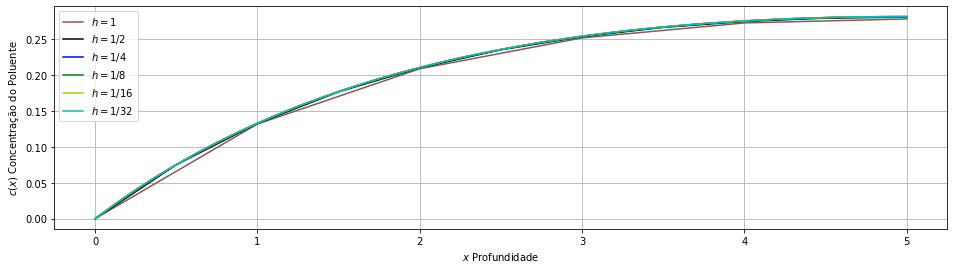

In [4]:
def find_acumulado(v):
    r = []
    r.append(v[0])
    for i in range(0,len(v) - 1):
        r.append(v[i+1] + r[i])
    return r

import matplotlib.pyplot as plt

c = []
x = []
ac = []
for i in range(0,10):
    h = 1/(2**i) # determina H com passo de 1/2
    aux,n = find_x(h)
    x.append(aux)
    c.append(solve(find_A(n,x[i],h),find_b(n,h,x[i]),n))
    
    ac.append(find_acumulado(c[i]))
    x[i]= np.concatenate(([0],x[i]),axis = None)


plt.figure(figsize = (16,9))
plt.subplot(2,1,1)
plt.plot(x[0], c[0], label = '$h = 1$' ,color = 'tab:brown')
plt.plot(x[1],c[1],label = '$h = 1/2$',color = 'k')
plt.plot(x[2],c[2],label = '$h = 1/4$',color = 'b')
plt.plot(x[3],c[3],label = '$h = 1/8$',color = 'g')
plt.plot(x[4],c[4],label = '$h = 1/16$',color = 'y')
plt.plot(x[5],c[5],label = '$h = 1/32$',color = 'c')
plt.xlabel('$x$ Profundidade')
plt.ylabel('$c(x)$ Concentração do Poluente')
plt.legend()
plt.grid()
plt.show





# **item c**

Notamos que apartir de $h = \frac{1}{4}$ há uma estabilização aproximada pelo método das diferenças finitas, notamos também, que como esperado, a concentração do poluente aumenta conforme nos aproximamos da superfície ($x = 5$) e diminui até zero quando nos aproximamos do fundo ($x = 0$). Para valores de $h$ menores (e.g. $h = 1,\frac{1}{2}$) notamos que a aproximação não é suave e conforme aumentamos o número de amostras, reduzindo o valor de $h$ (o qual é o intervalo entre amostras) a curva suaviza cada vez mais.


# **Questão 2**

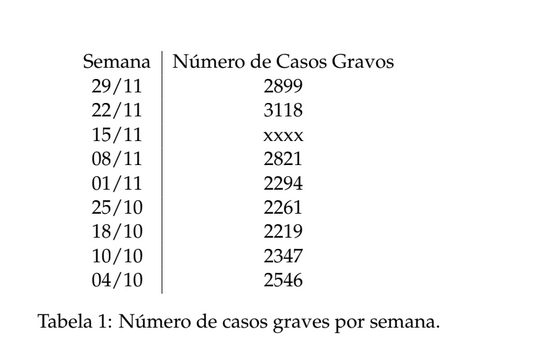

Utilizando o método de Newton descrito nas notas de aula, variando o grau da interpolação obtemos o seguinte algoritmo:

Para o grau 1 a aproximação obtida foram 2546.0 casos
Para o grau 2 a aproximação obtida foram 2546.0 casos
Para o grau 3 a aproximação obtida foram 3136.8571428571427 casos
Para o grau 4 a aproximação obtida foram 3711.251700680272 casos
Para o grau 5 a aproximação obtida foram 320.5733722060272 casos


<function matplotlib.pyplot.show>

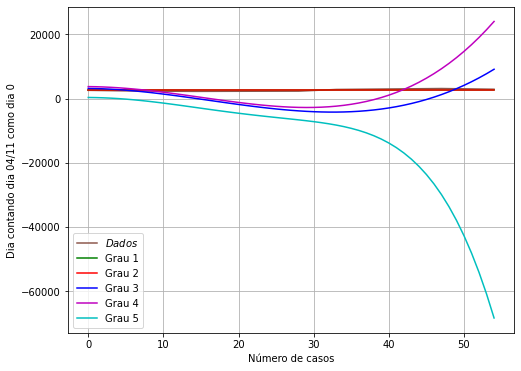

In [10]:
dias =  [0,   6,    14,  21,  28,  33,  47, 54]
casos = [2546,2347,2219,2261,2294,2821,3118,2889]
# Declaração da matriz A
def encontra_alpha(dias,casos,grau):
    
    grau = grau
    M = np.zeros((grau,grau),dtype = np.int64)
    y = np.zeros([grau,1],dtype = np.int64)
    M[0,0] = 1

    for i in range(0,grau):
        y[i] = casos[i]
    
    for i in range(1,grau): # linhas ( varia de coluna pra coluna!)
        
        M[i,0] = 1

        for j in range(i,grau): # colunas ( varia as linhas!)
            M[j,i] = 1
           
            for r in range(0,i): # multiplicadores           
                M[j,i] = M[j,i] * (dias[j] - dias[r])
    #print(y)
    alpha = np.linalg.solve(M,y)
    return alpha


def encontra_aproximacao(dia_a_saber,alpha,dias,grau):
 
    resultado = alpha[0]

    if (grau > 2):
        
        for i in range(1,grau):
            
            resultado_aux = alpha[i]
            for j in range(0,i):
                resultado_aux = resultado_aux*(dia_a_saber - dias[j])

            resultado += resultado_aux    
   
    return resultado

#### main

import matplotlib.pyplot as plt
alpha = []
grau_max = 5 # até qual grau iremos calcular nossas aproximações

for i in range(1,grau_max + 1):
    alpha.append(encontra_alpha(dias,casos,i))
    dia_perdido = encontra_aproximacao(44,alpha[i-1],dias,i)
    print("Para o grau",i,"a aproximação obtida foram",dia_perdido[0],"casos")


#### calcula a aproximação para cada grau para cada dia entre [0,55[
aproximacao = []
aux = []
days = []
for grau in range(1,grau_max + 1):
    for i in range(0,55):
        aux.append(encontra_aproximacao(i,alpha[grau-1],dias,grau)[0])
        
        if(grau == 1):
            days.append(i)
    aproximacao.append(aux)
    aux = []
plt.figure(figsize = (8,6))
plt.plot(dias, casos, label = '$Dados$' ,color = 'tab:brown')
plt.plot(days,aproximacao[0],label = "Grau 1", color = 'g')
plt.plot(days,aproximacao[1],label = "Grau 2", color = 'r')
plt.plot(days,aproximacao[2],label = "Grau 3", color = 'b')
plt.plot(days,aproximacao[3],label = "Grau 4", color = 'm')
plt.plot(days,aproximacao[4],label = "Grau 5", color = 'c')

plt.xlabel('Número de casos')
plt.ylabel('Dia contando dia 04/11 como dia 0')
plt.legend()
plt.grid()
plt.show



Se observarmos o gráfico notamos que a aproximação de grau 4 (cor roxa) se se aproxima muito dos dados no ponto em que se perdeu a quantidade de casos, no caso $x = 44$ com 3711 casos. Notamos também que a interpolação para grau 3 também se aproxima do valor real.

Com as aproximações calculadas, precisamos determinar qual delas apresenta o menor erro. Para isto, podemos utilizar a fórmula apresentada nas aulas.

>$\epsilon(x) = |f(x) - p_n(x)|$

Sendo $p_n(x)$ o valor de nossa aproximação no ponto $x$ e $f(x)$ o valor original dos dados foram fornecidos. 

Como temos somente os valores da tabela dada e nossa aproximação, o que podemos fazer é utilizar a seguinte fórmula:

>$\epsilon_n(x) = \Pi^n_{k = 0}|x - x_k|$ (multiplicado pelo maior valor das dif. div. de grau $n + 1$).



Logo, definindo uma função para o cálculo do erro temos:

In [ ]:
def erro(casos,alpha,grau,dias):
    # no caso iniciamos com o grau = 1 e vamos até grau = 7
    indice = grau - 1 # para os vetores 
    erro = 1

    for i in range(5,len(dias)):
        erro = erro*(44 - dias[i])
        print(erro)
    
    
    if (grau < len(alpha)):
        erro = erro*max(np.abs(alpha[grau]))
        return np.abs(erro)
    else:
        return 0


#erros = []
for i in range(1,grau_max):
    erros = erro(casos,alpha,i,dias)
    print("O erro para a aproximação de grau",i,"é",erros)